In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar o dataset
file_path = './healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path)
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [218]:
# Informações sobre o dataset
print(df.info())
# Estatísticas descritivas
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354   

In [219]:
# Verificar valores ausentes
missing_values = df.isnull().sum()
missing_values_count = df.isnull().sum(axis=1)
rows_with_missing_values = missing_values_count[missing_values_count > 0].count()
print('Linhas com algum atributo faltante', rows_with_missing_values)
print(missing_values)

Linhas com algum atributo faltante 201
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [220]:
# Remover linhas com valores ausentes
initial_row_count = df.shape[0]
df_clean = df.dropna()
final_row_count = df_clean.shape[0]
removed_rows = initial_row_count - final_row_count
print(f'Foram removidas {removed_rows} linhas')

Foram removidas 201 linhas


In [221]:
# Remover coluna id pois não é relevante
df_clean = df_clean.drop(columns=['id'])

In [222]:
# Verificar valores ausentes
missing_values = df_clean.isnull().sum()
print(missing_values)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [223]:
# Categorizar o atributo 'age'
bins = [0, 12, 18, 24, 59, float('inf')]
labels = ['criança', 'adolescente', 'jovem-adulto', 'adulto', 'idoso']
df_clean['age'] = pd.cut(df_clean['age'], bins=bins, labels=labels, right=False)

# Categorizar o atributo 'avg_glucose_level'
bins = [0, 70, 100, 125, float('inf')]
labels = ['baixo', 'normal', 'pre-diabetes', 'diabetes']
df_clean['avg_glucose_level'] = pd.cut(df_clean['avg_glucose_level'], bins=bins, labels=labels, right=False)

# Categorizar o atributo 'bmi'
bins = [0, 18.5, 25, 30, 35, 40, float('inf')]
labels = ['abaixo-do-peso', 'peso-normal', 'sobrepeso', 'obesidade1', 'obesidade2', 'obesidade3']
df_clean['bmi'] = pd.cut(df_clean['bmi'], bins=bins, labels=labels, right=False)

df_clean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,idoso,0,1,Yes,Private,Urban,diabetes,obesidade2,formerly smoked,1
2,Male,idoso,0,1,Yes,Private,Rural,pre-diabetes,obesidade1,never smoked,1
3,Female,adulto,0,0,Yes,Private,Urban,diabetes,obesidade1,smokes,1
4,Female,idoso,1,0,Yes,Self-employed,Rural,diabetes,peso-normal,never smoked,1
5,Male,idoso,0,0,Yes,Private,Urban,diabetes,sobrepeso,formerly smoked,1


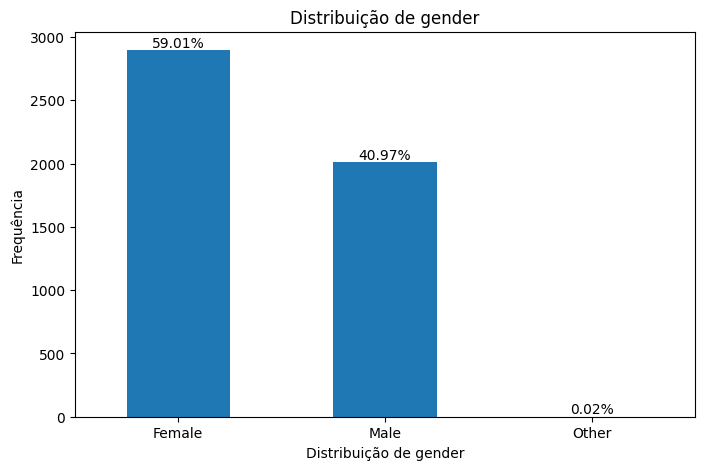

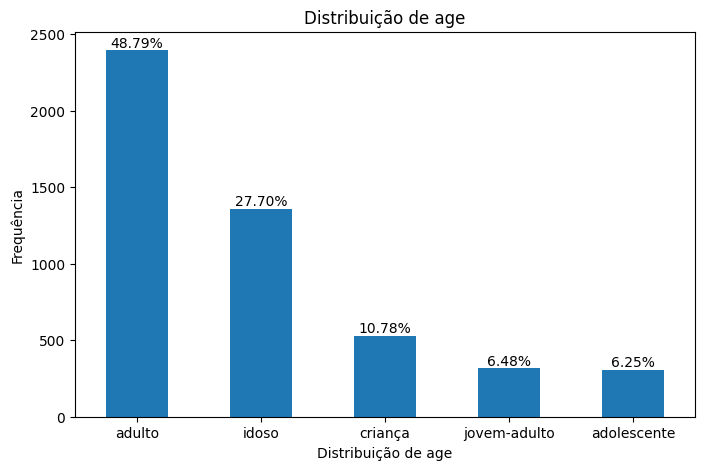

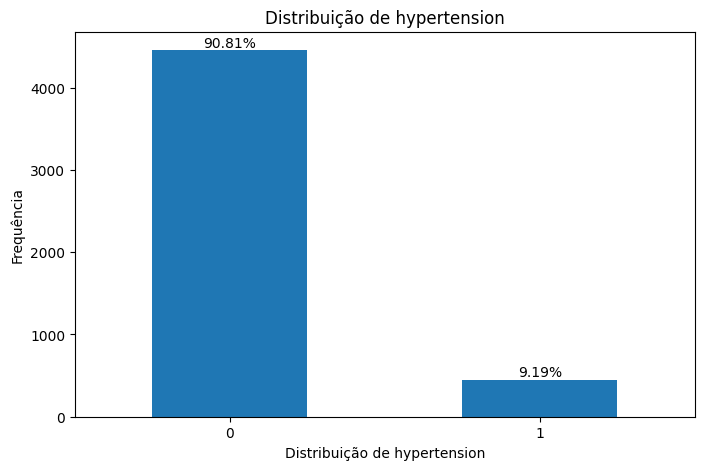

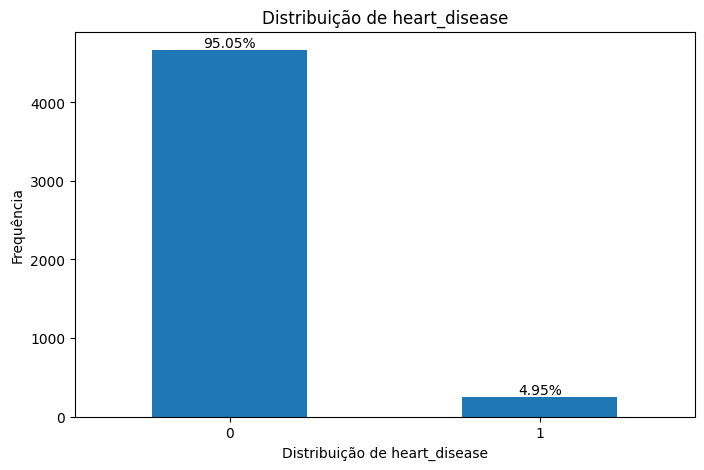

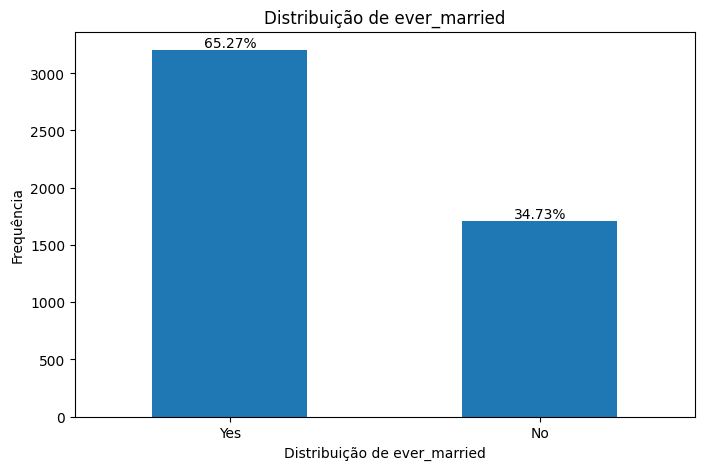

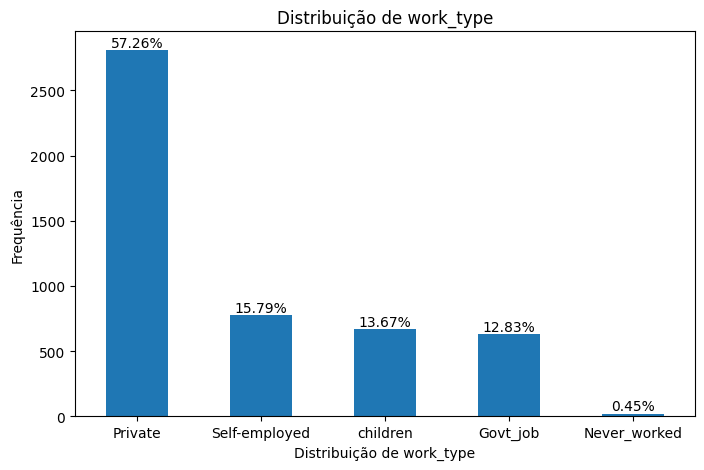

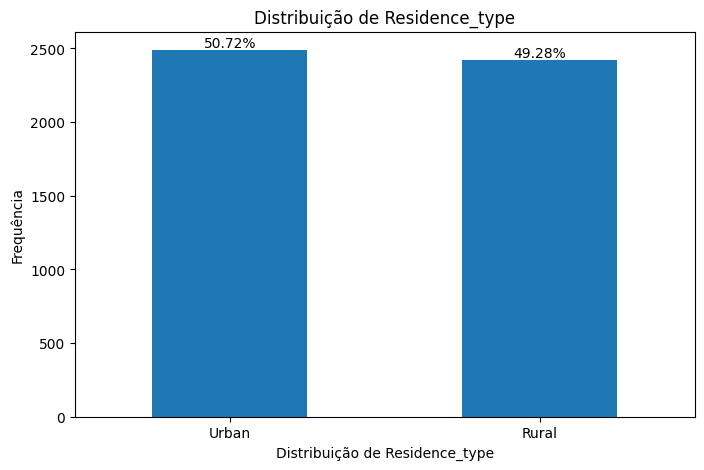

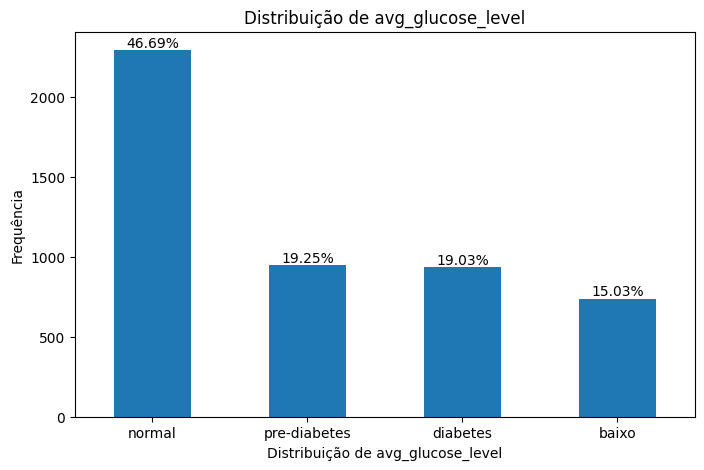

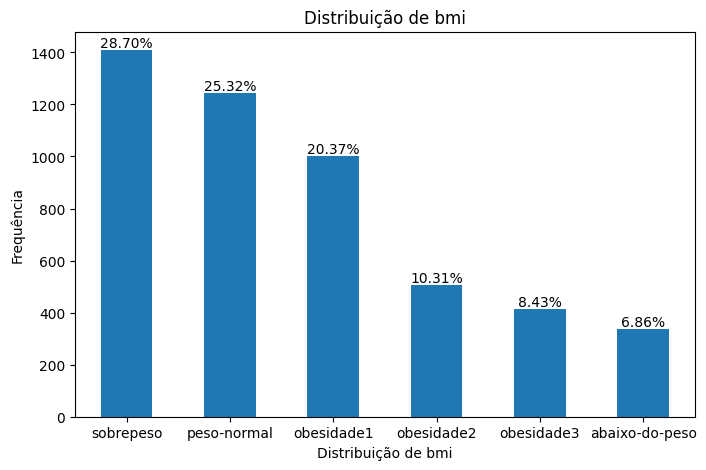

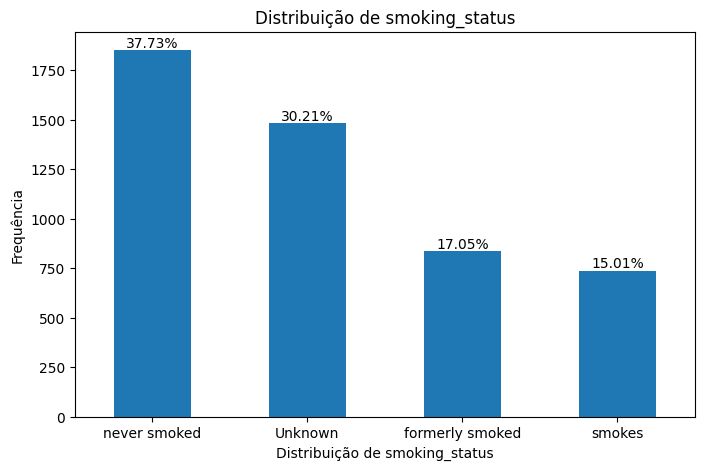

In [224]:
def show_dist_of(attribute, df, title=''):
    # Calcular a contagem de valores e a porcentagem
    temp_value_counts = df[attribute].value_counts()
    temp_percentages = (temp_value_counts / temp_value_counts.sum()) * 100

    # Plotar o gráfico de barras
    plt.figure(figsize=(8, 5))
    bars = temp_value_counts.plot(kind='bar')

    # Adicionar as porcentagens em cima de cada barra
    for bar, percentage in zip(bars.patches, temp_percentages):
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # posição x
            bar.get_height(),                   # posição y
            f'{percentage:.2f}%',               # texto
            ha='center',                        # alinhamento horizontal
            va='bottom'                         # alinhamento vertical
        )

    plt.title(f'Distribuição de {title}' if title else f'Distribuição de {attribute}')
    plt.xlabel(title if title else f'Distribuição de {attribute}')
    plt.ylabel('Frequência')
    plt.xticks(rotation=0)
    plt.show()

attributes = df_clean.columns.to_list().copy()

attributes.pop() # remover 'stroke'

for attr in attributes:
    show_dist_of(attr, df_clean)

In [225]:
# Remover colunas com baixa variabilidade
df_clean = df_clean.drop(columns=['heart_disease'])

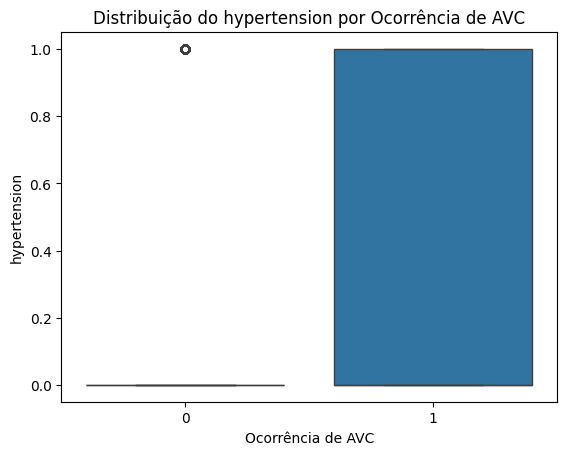

In [227]:
sns.boxplot(x='stroke', y='hypertension', data=df)
plt.title('Distribuição do hypertension por Ocorrência de AVC')
plt.xlabel('Ocorrência de AVC')
plt.ylabel('hypertension')
plt.show()